In [1]:
#minimum imports:
import time,os,sys,glob
import cPickle as pickle
import numpy as np
import glob

import khmer
sys.path.append(r'/n/home13/pzheng/Documents/python-functions/python-functions-library')

from LibraryConstruction import fastaread,fastawrite,fastacombine
import LibraryDesigner as ld
reload(ld);

In [ ]:

#Not necessary. Only do it once!
#This example is for the mouse genome.

#Construct whole genome hash table / similarly for transcriptome file
#Note: This is NOT degenerate for reverse-complement and it only maps the + strand.

#minimum imports:
import khmer,sys,glob
sys.path.append(r'/n/dulacfs2/Users/bbintu/python-functions/python-functions-library')
from LibraryConstruction import fastaread,fastawrite

#khmer's hash tables are very easy to understand at least with single threads (no parallel computation)
#Simply, each hash(sequence) = number in base 4. Z(num_table) prime numbers < a big number are specified 
#and the remainded of the hash is used to adress the Z tables. This allows for an easy bloom filter for finding
#missing kmers. Considering its simplicity for single thread there should be a Windows version!
#http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0101271

ksize = 17 #word size
kmer = khmer.Countgraph(ksize, 2e9, 4) #hash total table size 2e9*4. 4 is the number of tables (prime numbers) to use
kmer.set_use_bigcount(True) #This allows 2bytes for each count. Thus the maximum count is 2**16-1
#The total RAM required for this is thus 2e9*4*2*1.2 bytes = 19.2 gigabytes. 
#~20% is used for hash specific elements as documented by khmer.
#The size of the hash table is allocated at the beginning. 
#Note: if the size is too small there will be many collisions in the hash resulting in 'overinflated' counts.
#Note: unknown characters are mapped to A. (N->A)
#Note: the sequences need to be capitalized. (c->A, but C->C)

fa_fls = glob.glob(r'/n/dulacfs2/Users/bbintu/Genomes/mouse/mm10/*.fa')
save_file = r'/n/dulacfs2/Users/bbintu/Genomes/mouse/mm10/full_word'+str(ksize)+'_.kmer'
for fa_fl in fa_fls:
    print "Dealing with file:"+fa_fl
    nms,seqs = fastaread(fa_fl)
    for seq in seqs:
        kmer.consume(seq.upper())
kmer.save(save_file)
os.path.getsize(save_file)

In [2]:
#SI7 has 76 regions
_,wholechr = ld.fastaread(r'/n/dulacfs2/Users/bbintu/Genomes/human/hg38/chr21.fa')
wholechr = wholechr[0]

IOError: [Errno 13] Permission denied: '/n/dulacfs2/Users/bbintu/Genomes/human/hg38/chr21.fa'

In [53]:
#Write regions in folder
folder = r'/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs'
if not os.path.exists(folder):
    os.makedirs(folder)
nf = 140# number of regions
res = 30000 # 30 kb resolution
start = 28000000 #wheret to start in chr21
DNA_ = wholechr[start:start+nf*res]
for i in range(nf):
    seq = DNA_[i*res:(i+1)*res]
    seqs = [seq.upper()]
    names = ['chr21:'+str(start+i*res)+'-'+str(start+(i+1)*res)+'reg_'+str(i+1)]
    file_name = folder+os.sep+'reg_'+str(i+1)+'.fasta'
    ld.fastawrite(file_name, names, seqs)

In [ ]:
#Write regions for SI7 in folder
folder = r'/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs'
if not os.path.exists(folder):
    os.makedirs(folder)
nf = 140# number of regions
res = 30000 # 30 kb resolution
start = 28000000 #wheret to start in chr21
DNA_ = wholechr[start-nf*res:start]
for i in range(nf):
    print
    seq = wholechr[start-(i+1)*res:start-i*res]
    seqs = [seq.upper()]
    names = ['chr21:'+str(start-(i+1)*res)+'-'+str(start-i*res)+'reg_'+str(-i-1)]
    print names
    file_name = folder+os.sep+'reg_'+str(-i-1)+'.fasta'
    ld.fastawrite(file_name, names, seqs)

In [3]:
#Write regions in folder for Jun-Han's favourite region chr4:52833833-52833833+1700000(hg38)  chr4:53,700,000-55,400,000
folder = r'/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs2'
if not os.path.exists(folder):
    os.makedirs(folder)

_,wholechr = ld.fastaread(r'/n/dulacfs2/Users/bbintu/Genomes/human/hg38/chr4.fa')
wholechr = wholechr[0]

nf = 170# number of regions
res = 10000 # 30 kb resolution
start = 52833833 #wheret to start in chr4
DNA_ = wholechr[start:start+nf*res]
for i in range(nf):
    seq = DNA_[i*res:(i+1)*res]
    seqs = [seq.upper()]
    names = ['chr21:'+str(start+i*res)+'-'+str(start+(i+1)*res)+'reg_'+str(i+1)]
    file_name = folder+os.sep+'reg_'+str(i+1)+'.fasta'
    ld.fastawrite(file_name, names, seqs)

In [ ]:
#SI7 design
#>chr21:28000000-30300000_res:30000bp_SHORT-CELLDIF_reg_0_pb_70_S4com_indexAB:[10, 17]_read(Stv_extended):Stv_2
#cacgg
#TTGCTAGCGTGGGCCAATCGcatcaacgccacgatcagctGCTATCGTTCGTTCGAGGCC
#ttaccatcagaaacaacttatcaaaacacagcaatacctgcc
#TCTCGCGATTTCCGCACAGGaccgactttgg
#...
#>chr21:28000000-30300000_res:30000bp_SHORT-CELLDIF_reg_75_pb_29825_S4com_indexAB:[10, 17]_read(Stv_extended):Stv_78
#cacggTTGCTAGCGTGGGCCAATCGcatcaacgccacgatcagctAGCGATTCGCCGTTGTTGAC
#taggagcaatcttcttgcctgccagagagtcttgcaaaaaaaTCTCGCGATTTCCGCACAGGaccgactttgg


In [6]:
##Construct SI13 probes - Jun-Han

import time,os,sys
sys.path.append(r'/n/dulacfs2/Users/bbintu/python-functions/python-functions-library')
import LibraryDesigner as ld
import numpy as np
reload(ld)

#genome expected size: 1.14*4*2e9*2 bytes
#genome transcriptome size: 2.2e9 bytes
#rest neglijable

#To allow RNA and DNA fish 
#for RNA: need to screen against genome and subtract the "local genome" corresponding to the gene
files = glob.glob(r'/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs2/*.fasta')
for i in range(len(files)):
    in_file = files[i]
    print in_file
    save_folder = r'/n/dulacfs2/Users/bbintu/Libraries/SI13/Reports2'
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
    save_file = save_folder+os.sep+os.path.basename(in_file).replace('.fasta','.pbr')#'/pb_reports_reg_'+str(-i-1)+'.pbr'
    if not os.path.exists(save_file.replace('.pbr','.png')):
        genome_fl = r'/n/dulacfs2/Users/bbintu/Genomes/human/hg38/full_word17_.kmer'
        rep_genome_fl = r'/n/dulacfs2/Users/bbintu/Genomes/human/hg38/HumanRepeats_word17_.kmer'

        local_genome_fl = in_file

        pb_designer = ld.pb_reports_class(
            sequence_dic={'file':in_file,'use_revc':False,'use_kmer':True},
            map_dic={'genome':{'file':genome_fl,'use_revc':True,'use_kmer':True},
                  'rep_genome':{'file':rep_genome_fl,'use_revc':True,'use_kmer':True},
                  'local_genome':{'file':local_genome_fl,'force_list':True,'use_revc':True,'use_kmer':True}},
            save_file=save_file,
            params_dic={'word_size':17,'pb_len':42,'buffer_len':2,'max_count':2**16-1,'check_on_go':False,'auto':False},
            dic_check={('genome','local_genome'):75,'rep_genome':0,'gc':[0.25,0.85],'tm':70,'masks':['AAAAA','TTTTT','GGGGG','CCCCC']})

        pb_designer.computeOTmaps()
        pb_designer.compute_pb_report()
        pb_designer.perform_check_end()
        pb_designer.plots()
        print len(pb_designer.pb_reports_keep)

/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs2/reg_1.fasta
Setting attribute: map_local_genome
Mapping no. of seqs: 1
Setting attribute: map_genome
Setting attribute: map_rep_genome
Time(s): 71.9454729557
Dealing with sequence: 1 out of 1
Time(s): 3.29763388634
Picking non-overlaping sequences.
Time(s): 0.363820075989


/n/home02/bbintu/.conda/envs/python27rc/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


174
/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs2/reg_2.fasta
Setting attribute: map_local_genome
Mapping no. of seqs: 1
Setting attribute: map_genome
Setting attribute: map_rep_genome
Time(s): 4.71674895287
Dealing with sequence: 1 out of 1
Time(s): 3.35131788254
Picking non-overlaping sequences.
Time(s): 0.366889953613
174
/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs2/reg_3.fasta
Setting attribute: map_local_genome
Mapping no. of seqs: 1
Setting attribute: map_genome
Setting attribute: map_rep_genome
Time(s): 4.51105189323
Dealing with sequence: 1 out of 1
Time(s): 3.37798595428
Picking non-overlaping sequences.
Time(s): 0.317958116531
180
/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs2/reg_4.fasta
Setting attribute: map_local_genome
Mapping no. of seqs: 1
Setting attribute: map_genome
Setting attribute: map_rep_genome
Time(s): 4.47784590721
Dealing with sequence: 1 out of 1
Time(s): 3.37523007393
Picking non-overlaping sequences.
Time(s): 0.342834949493
198
/n/dulacfs2/Users/

In [2]:
##Construct SI13 probes

import time,os,sys
sys.path.append(r'/n/dulacfs2/Users/bbintu/python-functions/python-functions-library')
import LibraryDesigner as ld
import numpy as np
reload(ld)

#genome expected size: 1.14*4*2e9*2 bytes
#genome transcriptome size: 2.2e9 bytes
#rest neglijable

#To allow RNA and DNA fish 
#for RNA: need to screen against genome and subtract the "local genome" corresponding to the gene
files = glob.glob(r'/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs/*.fasta')
for i in range(140):
    in_file = r'/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs/reg_'+str(-i-1)+'.fasta'
    print in_file
    save_file = r'/n/dulacfs2/Users/bbintu/Libraries/SI13/Reports/pb_reports_reg_'+str(-i-1)+'.pbr'
    if not os.path.exists(save_file.replace('.pbr','.png')):
        genome_fl = r'/n/dulacfs2/Users/bbintu/Genomes/human/hg38/full_word17_.kmer'
        rep_genome_fl = r'/n/dulacfs2/Users/bbintu/Genomes/human/hg38/HumanRepeats_word17_.kmer'

        local_genome_fl = in_file

        pb_designer = ld.pb_reports_class(
            sequence_dic={'file':in_file,'use_revc':False,'use_kmer':True},
            map_dic={'genome':{'file':genome_fl,'use_revc':True,'use_kmer':True},
                  'rep_genome':{'file':rep_genome_fl,'use_revc':True,'use_kmer':True},
                  'local_genome':{'file':local_genome_fl,'force_list':True,'use_revc':True,'use_kmer':True}},
            save_file=save_file,
            params_dic={'word_size':17,'pb_len':42,'buffer_len':2,'max_count':2**16-1,'check_on_go':False,'auto':False},
            dic_check={('genome','local_genome'):75,'rep_genome':0,'gc':[0.25,0.85],'tm':70,'masks':['AAAAA','TTTTT','GGGGG','CCCCC']})

        pb_designer.computeOTmaps()
        pb_designer.compute_pb_report()
        pb_designer.perform_check_end()
        pb_designer.plots()
        print len(pb_designer.pb_reports_keep)

/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs/reg_-1.fasta
/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs/reg_-2.fasta
/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs/reg_-3.fasta
/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs/reg_-4.fasta
/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs/reg_-5.fasta
/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs/reg_-6.fasta
/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs/reg_-7.fasta
/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs/reg_-8.fasta
/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs/reg_-9.fasta
/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs/reg_-10.fasta
/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs/reg_-11.fasta
/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs/reg_-12.fasta
/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs/reg_-13.fasta
/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs/reg_-14.fasta
/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs/reg_-15.fasta
/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs/reg_-16.fasta
/n/dulacfs2/Users

/n/home02/bbintu/.conda/envs/python27rc/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


441
/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs/reg_-95.fasta
Setting attribute: map_local_genome
Mapping no. of seqs: 1
Setting attribute: map_genome
Setting attribute: map_rep_genome
Time(s): 4.94954586029
Dealing with sequence: 1 out of 1
Time(s): 10.4369320869
Picking non-overlaping sequences.
Time(s): 1.30542993546
376
/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs/reg_-96.fasta
Setting attribute: map_local_genome
Mapping no. of seqs: 1
Setting attribute: map_genome
Setting attribute: map_rep_genome
Time(s): 4.62594819069
Dealing with sequence: 1 out of 1
Time(s): 10.5096700191
Picking non-overlaping sequences.
Time(s): 1.26803302765
407
/n/dulacfs2/Users/bbintu/Libraries/SI13/DNAseqs/reg_-97.fasta
Setting attribute: map_local_genome
Mapping no. of seqs: 1
Setting attribute: map_genome
Setting attribute: map_rep_genome
Time(s): 4.62181210518
Dealing with sequence: 1 out of 1
Time(s): 10.228760004
Picking non-overlaping sequences.
Time(s): 1.32107996941
411
/n/dulacfs2/Users/b

In [ ]:
#to continue or check sequences:
reload(ld)

pbde = ld.pb_reports_class()
files = glob.glob(r'/n/dulacfs2/Users/bbintu/Libraries/SI13/Reports/*.pbr')
for file_ in files:
    pbde.load_pbr(file_)
    pbde.dic_check={'gc': [0.25, 0.85], 'rep_genome': 0, 'tm': 70, ('genome', 'local_genome'): 75,
                    'masks':['AAAAA','TTTTT','GGGGG','CCCCC']}
    pbde.perform_check_end()
    print file_
    print len(pbde.pb_reports_keep)
    pbde.plots()

In [82]:
pbde.save_file.replace('.pbr','.csv')

'/n/dulacfs2/Users/bbintu/Libraries/SI13/Reports/pb_reports_reg_1.csv'

In [83]:
os.linesep

'\n'

In [21]:
#Prepare Tads
reload(ld)
target_folder = r'/n/dulacfs2/Users/bbintu/Libraries/SI10/DNA/TADs'
if not os.path.exists(target_folder):
    os.makedirs(target_folder)
TAD_coords_fl = r'/n/dulacfs2/Users/bbintu/Libraries/SI10/TADs.coords'
#Downloaded from the cortex mouse data from http://chromosome.sdsc.edu/mouse/hi-c/download.html

TAD_coords_all = []
for ln in open(TAD_coords_fl,'r'):
    coords_split = ln[:-1].split('\t')
    if coords_split[0]=='chrX':
        TAD_coords_all.append(coords_split[0]+':'+coords_split[1]+'-'+coords_split[2])

def center_window(coord,sz=100000):
    "Given coordinate in form: chrxx:xx-xx, returns coordinate centered fo size sz"
    chr_ = coord.split(':')[0]
    crd = np.array(coord.split(':')[-1].split('-'),dtype=int)
    return chr_+':'+str(int(np.mean(crd))-sz/2)+'-'+str(int(np.mean(crd))+sz/2)
TAD_coords_all = map(center_window,TAD_coords_all)

epbd = ld.pb_reports_class()
for target_index,TAD_coords in enumerate(TAD_coords_all):
    epbd.coords_to_seq(TAD_coords,genome_folder=r'/n/dulacfs2/Users/bbintu/Genomes/mouse/mm10',
                       save_file=target_folder+os.sep+'TAD'+str(target_index)+'.fasta')

In [75]:
#Single TAD example
#r'/n/dulacfs2/Users/bbintu/Transcriptomes/mouse/mm10_rna.fasta'
#r'/n/dulacfs2/Users/bbintu/Transcriptomes/mouse/mm10_rna_word17_.pkl'
#genome size: 1.14*4*2e9*2 bytes
#transcriptome expected size: 2.2e9 bytes for no kmer, 1e9 for kmer
#rest neglijable
reload(ld)
in_files = glob.glob(r'/n/dulacfs2/Users/bbintu/Libraries/SI10/DNA/TADs/*.fasta')

in_file = in_files[0]
save_file = r'/n/dulacfs2/Users/bbintu/Libraries/SI10/Reports'+os.sep+os.path.basename(in_file).replace('.fasta','.pbr')

transcriptome_fl = r'/n/dulacfs2/Users/bbintu/Transcriptomes/mouse/mm10_rna_word17_.kmer'
genome_fl = r'/n/dulacfs2/Users/bbintu/Genomes/mouse/mm10/full_word17_.kmer'
rep_transcriptome_fl = r'/n/dulacfs2/Users/bbintu/Transcriptomes/mouse/rtRNA.fasta'
rep_genome_fl = r'/n/dulacfs2/Users/bbintu/Genomes/mouse/mm10/repeatSequences.fasta'
local_genome_fl = r'/n/dulacfs2/Users/bbintu/Genomes/mouse/mm10/chrX_word17_.kmer'

pb_designer = ld.pb_reports_class(
    sequence_dic={'file':in_file,'use_revc':True,'use_kmer':True},
    map_dic={'transcriptome':{'file':transcriptome_fl,'use_revc':False,'use_kmer':True},
          'genome':{'file':genome_fl,'use_revc':True,'use_kmer':True},
          'rep_transcriptome':{'file':rep_transcriptome_fl,'use_revc':True,'use_kmer':True},
          'rep_genome':{'file':rep_genome_fl,'use_revc':True,'use_kmer':True},
          'local_genome':{'file':local_genome_fl,'force_list':True,'use_revc':True,'use_kmer':True}},
    save_file=save_file,
    params_dic={'word_size':17,'pb_len':42,'buffer_len':2,'max_count':2**16-1,'check_on_go':False,'auto':False},
    dic_check={'transcriptome':3,('genome','local_genome'):20,
                'rep_transcriptome':0,'rep_genome':0,'gc':[0.25,0.75],'tm':70})

pb_designer.computeOTmaps()
pb_designer.compute_pb_report()
pb_designer.perform_check_end()
pb_designer.plots()

Setting attribute: map_local_genome
Setting attribute: map_rep_transcriptome
Mapping no. of seqs: 786
Setting attribute: map_genome
Setting attribute: map_transcriptome
Setting attribute: map_rep_genome
Mapping no. of seqs: 1569
Time(s):15.9287130833
Dealing with sequence: 1 out of 1
Time(s):276.220309019
Time(s):25.2412719727


In [11]:
#Use RC serial_reque
#Note: this has a bottleneck of trying to read from the same location the big khmer file
#Consided making (100) copies of this and distribute for increased speed.
def notebook_string(in_file):
    return """
#This is an auto generated string

##imports
import time,os,sys,glob
import cPickle as pickle
import numpy as np

import khmer
sys.path.append(r'/n/dulacfs2/Users/bbintu/python-functions/python-functions-library')
from LibraryConstruction import fastaread,fastawrite
import LibraryDesigner as ld

in_file = r'"""+in_file+"""'
save_file = r'/n/dulacfs2/Users/bbintu/Libraries/SI10/Reports'+os.sep+os.path.basename(in_file).replace('.fasta','.pbr')

transcriptome_fl = r'/n/dulacfs2/Users/bbintu/Transcriptomes/mouse/mm10_rna_word17_.kmer'
genome_fl = r'/n/dulacfs2/Users/bbintu/Genomes/mouse/mm10/full_word17_.kmer'
rep_transcriptome_fl = r'/n/dulacfs2/Users/bbintu/Transcriptomes/mouse/rtRNA.fasta'
rep_genome_fl = r'/n/dulacfs2/Users/bbintu/Genomes/mouse/mm10/repeatSequences.fasta'
local_genome_fl = r'/n/dulacfs2/Users/bbintu/Genomes/mouse/mm10/chrX_word17_.kmer'

pb_designer = ld.pb_reports_class(
    sequence_dic={'file':in_file,'use_revc':True,'use_kmer':True},
    map_dic={'transcriptome':{'file':transcriptome_fl,'use_revc':False,'use_kmer':True},
          'genome':{'file':genome_fl,'use_revc':True,'use_kmer':True},
          'rep_transcriptome':{'file':rep_transcriptome_fl,'use_revc':True,'use_kmer':True},
          'rep_genome':{'file':rep_genome_fl,'use_revc':True,'use_kmer':True},
          'local_genome':{'file':local_genome_fl,'force_list':True,'use_revc':True,'use_kmer':True}},
    save_file=save_file,
    params_dic={'word_size':17,'pb_len':42,'buffer_len':2,'max_count':2**16-1,'check_on_go':False,'auto':False},
    dic_check={'transcriptome':3,('genome','local_genome'):20,
                'rep_transcriptome':0,'rep_genome':0,'gc':[0.25,0.75],'tm':70})

pb_designer.computeOTmaps()
pb_designer.compute_pb_report()
pb_designer.perform_check_end()
pb_designer.plots()

"""
reload(ld)

in_files = glob.glob(r'/n/dulacfs2/Users/bbintu/Libraries/SI10/DNA/TADs/*.fasta')
python_files = ld.python_scripts(notebook_string,in_files,
                  save_folder=r'/n/dulacfs2/Users/bbintu/Libraries/SI10/slurm_scripts',file_base='TAD_script')
python_files = glob.glob('/n/dulacfs2/Users/bbintu/Libraries/SI10/slurm_scripts/*.py')
job_ids=[]
print "Auto starting no. jobs: "+str(len(python_files))
for python_file in python_files:
    job_return_message = ld.slurm_python(python_file,n=1,N=1,t='0-03:00',p='serial_requeue',mem=32000,
                 err_file=None,out_file=None,slurm_script=None,job_index=False)
    time.sleep(0.5)
    print job_return_message
    job_ids.append(job_return_message.split('job ')[-1][:-1])
    
    
import subprocess
print subprocess.check_output('squeue')

In [8]:
#Alistair's regions
reload(ld)
target_folder = r'/n/dulacfs2/Users/bbintu/Libraries/SI10/DNA'
old_coords = ['chrX:103405001-103455000','chrX:106185001-106235000',
              'chrX:20050001-20100000','chrX:6873484-6948363','chrX:103950001-104000000']
#From Alistair
def left_window(coord,sz=200000):
    chr_ = coord.split(':')[0]
    crd = np.array(coord.split(':')[-1].split('-'),dtype=int)
    return chr_+':'+str(int(crd[0]-sz))+'-'+str(int(crd[0]))
left_coords = map(left_window,old_coords)


epbd = ld.pb_reports_class()
for target_index,coords in enumerate(old_coords):
    epbd.coords_to_seq(coords,genome_folder=r'/n/dulacfs2/Users/bbintu/Genomes/mouse/mm10',
                       save_file=target_folder+os.sep+'old_'+str(target_index)+'.fasta')
for target_index,coords in enumerate(left_coords):
    epbd.coords_to_seq(coords,genome_folder=r'/n/dulacfs2/Users/bbintu/Genomes/mouse/mm10',
                       save_file=target_folder+os.sep+'left_'+str(target_index)+'.fasta')

In [ ]:
reload(ld)
master_folder  = r'/n/dulacfs2/Users/bbintu/Libraries/SI10/DNA'
in_files = glob.glob(master_folder+os.sep+'old*.fasta')+glob.glob(master_folder+os.sep+'left*.fasta')
in_files = in_files[-2:]

save_files = [r'/n/dulacfs2/Users/bbintu/Libraries/SI10/Reports/'+os.path.basename(in_file).split('.')[0]+'.pbr' 
              for in_file in in_files]

transcriptome_fl = r'/n/dulacfs2/Users/bbintu/Transcriptomes/mouse/mm10_rna_word17_.kmer'
genome_fl = r'/n/dulacfs2/Users/bbintu/Genomes/mouse/mm10/full_word17_.kmer'
rep_transcriptome_fl = r'/n/dulacfs2/Users/bbintu/Transcriptomes/mouse/rtRNA.fasta'
rep_genome_fl = r'/n/dulacfs2/Users/bbintu/Genomes/mouse/mm10/repeatSequences.fasta'
local_genome_fl = in_files



pb_designer = ld.pb_reports_class(
    sequence_dic={'file':None,'use_revc':True,'use_kmer':True},
    map_dic={'transcriptome':{'file':transcriptome_fl,'use_revc':False,'use_kmer':True},
          'genome':{'file':genome_fl,'use_revc':True,'use_kmer':True},
          'rep_transcriptome':{'file':rep_transcriptome_fl,'use_revc':True,'use_kmer':True},
          'rep_genome':{'file':rep_genome_fl,'use_revc':True,'use_kmer':True},
          'local_genome':{'file':None,'force_list':True,'use_revc':True,'use_kmer':True}},
    save_file=None,
    params_dic={'word_size':17,'pb_len':42,'buffer_len':2,'max_count':2**16-1,'check_on_go':False,'auto':False},
    dic_check={'transcriptome':3,('genome','local_genome'):20,
                'rep_transcriptome':0,'rep_genome':0,'gc':[0.25,0.75],'tm':70})

pb_designer.computeOTmaps()

for sequence_file,save_file in zip(in_files,save_files):
    #modify input file
    pb_designer.sequence_dic['file'] = sequence_file
    #modify save file
    pb_designer.save_file = save_file
    pb_designer.load_sequence_file_and_paramaters()
    #modify maps
    key='local_genome'
    pb_designer.map_dic[key]['file'] = sequence_file
    pb_designer.files_to_OTmap("map_"+key,pb_designer.map_dic[key])
    #compute
    pb_designer.compute_pb_report()
    pb_designer.perform_check_end()
    pb_designer.plots()

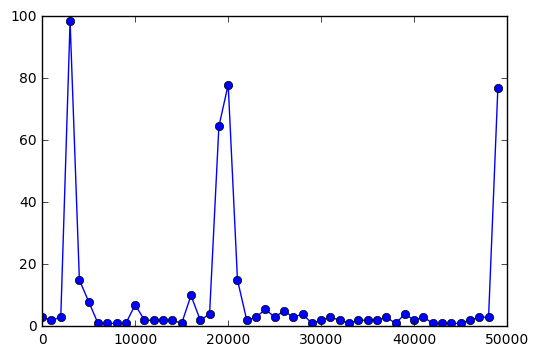

In [147]:
keys = [key for key in pbde.pb_reports.keys() if pbde.pb_reports[key]['reg_index']==0]
sz=1000
map_key = 'transcriptome'
pb_indexes_map = [pbde.pb_reports[key]['pb_index']/int(sz) for key in keys ]
import matplotlib.pyplot as plt
plt.plot(np.unique(pb_indexes_map)*sz,map(np.median,ld.partition_map([pbde.pb_reports[key][map_key] for key in keys],pb_indexes_map)),'o-')
plt.show()

In [ ]:
#Deal with human sequences

In [2]:
#hg19:chr7:137150000-137800000
#hg38:chr7:137425135-138075135


#Construct whole genome hash table / similarly for transcriptome file
#Note: This is NOT degenerate for reverse-complement and it only maps the + strand.

#minimum imports:
import khmer,sys,glob,os
sys.path.append(r'/n/dulacfs2/Users/bbintu/python-functions/python-functions-library')
from LibraryConstruction import fastaread,fastawrite

ksize = 17 #word size
kmer = khmer.Countgraph(ksize, 2e9, 4) #hash total table size 2e9*4. 4 is the number of tables (prime numbers) to use
kmer.set_use_bigcount(True) #This allows 2bytes for each count. Thus the maximum count is 2**16-1
fa_fls = glob.glob(r'/n/dulacfs2/Users/bbintu/Genomes/human/hg38/*.fa')
save_file = r'/n/dulacfs2/Users/bbintu/Genomes/human/hg38/full_word'+str(ksize)+'_.kmer'
for fa_fl in fa_fls:
    print "Dealing with file:"+fa_fl
    nms,seqs = fastaread(fa_fl)
    for seq in seqs:
        kmer.consume(seq.upper())
kmer.save(save_file)
os.path.getsize(save_file)


Dealing with file:/n/dulacfs2/Users/bbintu/Genomes/human/hg38/chr1.fa
Dealing with file:/n/dulacfs2/Users/bbintu/Genomes/human/hg38/chr10.fa
Dealing with file:/n/dulacfs2/Users/bbintu/Genomes/human/hg38/chr10_GL383545v1_alt.fa
Dealing with file:/n/dulacfs2/Users/bbintu/Genomes/human/hg38/chr10_GL383546v1_alt.fa
Dealing with file:/n/dulacfs2/Users/bbintu/Genomes/human/hg38/chr10_KI270824v1_alt.fa
Dealing with file:/n/dulacfs2/Users/bbintu/Genomes/human/hg38/chr10_KI270825v1_alt.fa
Dealing with file:/n/dulacfs2/Users/bbintu/Genomes/human/hg38/chr11.fa
Dealing with file:/n/dulacfs2/Users/bbintu/Genomes/human/hg38/chr11_GL383547v1_alt.fa
Dealing with file:/n/dulacfs2/Users/bbintu/Genomes/human/hg38/chr11_JH159136v1_alt.fa
Dealing with file:/n/dulacfs2/Users/bbintu/Genomes/human/hg38/chr11_JH159137v1_alt.fa
Dealing with file:/n/dulacfs2/Users/bbintu/Genomes/human/hg38/chr11_KI270721v1_random.fa
Dealing with file:/n/dulacfs2/Users/bbintu/Genomes/human/hg38/chr11_KI270826v1_alt.fa
Dealing wit

NameError: name 'os' is not defined

In [2]:
#minimum imports:
import time,os,sys,glob
import cPickle as pickle
import numpy as np

import khmer
sys.path.append(r'/n/dulacfs2/Users/bbintu/python-functions/python-functions-library')
from LibraryConstruction import fastaread,fastawrite,fastacombine
import LibraryDesigner as ld
reload(ld)
#
save_folder = r'/n/dulacfs2/Users/bbintu/Libraries/SI10/DNA/SI10LAreg'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
#From Alistair
def split_window(coord,sz=5000):
    chr_ = coord.split(':')[0]
    crd = np.array(coord.split(':')[-1].split('-'),dtype=int)
    left_edges = range(crd[0],crd[1],sz)
    return [chr_+':'+str(edge)+'-'+str(edge+sz) for edge in left_edges]
coords_full = split_window('chr7:137425135-138075135',sz=5000)


epbd = ld.pb_reports_class()
for target_index,coords in enumerate(coords_full):
    epbd.coords_to_seq(coords,genome_folder=r'/n/dulacfs2/Users/bbintu/Genomes/human/hg38',
                       save_file=save_folder+os.sep+'SI10LAreg_'+str(target_index)+'.fasta')

ls: cannot access /n/dulacfs2/Users/bbintu/Genomes/human/hg38/: Permission denied


In [8]:
reload(ld)


#Multiplexed human region

in_files = glob.glob(r'/n/dulacfs2/Users/bbintu/Libraries/SI10/DNA/SI10LAreg/*.fasta')
save_file = r'/n/dulacfs2/Users/bbintu/Libraries/SI10/Reports/SI10LAreg.pbr'

genome_fl = r'/n/dulacfs2/Users/bbintu/Genomes/human/hg38/full_word17_.kmer'
rep_genome_fl = r'/n/dulacfs2/Users/bbintu/Genomes/human/hg38/HumanRepeats.fasta'
local_genome_full_fl = in_files
local_genome_region_fls = in_files

pb_designer = ld.pb_reports_class(
    sequence_dic={'file':None,'use_revc':True,'use_kmer':True},
    map_dic={'genome':{'file':genome_fl,'use_revc':True,'use_kmer':True},
          'rep_genome':{'file':rep_genome_fl,'use_revc':True,'use_kmer':True},
          'local_genome_full':{'file':local_genome_full_fl,'use_revc':True,'use_kmer':True},
          'local_genome_region':{'file':None,'force_list':True,'use_revc':True,'use_kmer':True}},
    save_file=save_file,
    params_dic={'word_size':17,'pb_len':42,'buffer_len':2,'max_count':2**16-1,'check_on_go':False,'auto':False,'plot_bp':1000},
    dic_check={('local_genome_full','local_genome_region'):0,('genome','local_genome_region'):20,
                'rep_genome':0,'gc':[0.25,0.75],'tm':70})

pb_designer.computeOTmaps()
for in_file in in_files:
    #modify input file
    pb_designer.sequence_dic['file'] = in_file
    #modify save file
    pb_designer.save_file = r'/n/dulacfs2/Users/bbintu/Libraries/SI10/Reports'+os.sep+os.path.basename(in_file).replace('.fasta','.pbr')
    pb_designer.load_sequence_file_and_paramaters()
    #modify maps
    key='local_genome_region'
    pb_designer.map_dic[key]['file'] = in_file
    pb_designer.files_to_OTmap("map_"+key,pb_designer.map_dic[key])
    #compute
    pb_designer.compute_pb_report()
    pb_designer.perform_check_end()
    pb_designer.plots()

Setting attribute: map_local_genome_region
No files
Setting attribute: map_local_genome_full
Mapping no. of seqs: 130
Setting attribute: map_genome
Setting attribute: map_rep_genome
Mapping no. of seqs: 1105
Time(s): 15.1729688644
Setting attribute: map_local_genome_region
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 22.8726620674
Picking non-overlaping sequences.
Time(s): 2.05107402802
Setting attribute: map_local_genome_region
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 22.5253419876
Picking non-overlaping sequences.
Time(s): 1.78304409981


/n/home02/bbintu/.conda/envs/python27rc/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Setting attribute: map_local_genome_region
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 22.6527731419
Picking non-overlaping sequences.
Time(s): 1.95696616173
Setting attribute: map_local_genome_region
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 22.7846200466
Picking non-overlaping sequences.
Time(s): 1.67343497276
Setting attribute: map_local_genome_region
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 22.7172889709
Picking non-overlaping sequences.
Time(s): 1.96510386467
Setting attribute: map_local_genome_region
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 22.6795928478
Picking non-overlaping sequences.
Time(s): 1.79225111008
Setting attribute: map_local_genome_region
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 22.7195060253
Picking non-overlaping sequences.
Time(s): 1.66676592827
Setting attribute: map_local_genome_region
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1


In [4]:
#149450-GM4559
#chr7:149450-149900
#mm10: chr7:142269672-142747345

-96

In [5]:
#minimum imports:
import time,os,sys,glob
import cPickle as pickle
import numpy as np

import khmer
sys.path.append(r'/n/dulacfs2/Users/bbintu/python-functions/python-functions-library')
from LibraryConstruction import fastaread,fastawrite,fastacombine
import LibraryDesigner as ld
reload(ld)
#
save_folder = r'/n/dulacfs2/Users/bbintu/Libraries/SI10/DNA/SI10IGF2H19'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
#From Alistair
def split_window(coord,sz=5000):
    chr_ = coord.split(':')[0]
    crd = np.array(coord.split(':')[-1].split('-'),dtype=int)
    left_edges = range(crd[0],crd[1],sz)
    return [chr_+':'+str(edge)+'-'+str(edge+sz) for edge in left_edges]
coords_full = split_window('chr7:142269672-142747345',sz=5000)


epbd = ld.pb_reports_class()
for target_index,coords in enumerate(coords_full):
    epbd.coords_to_seq(coords,genome_folder=r'/n/dulacfs2/Users/bbintu/Genomes/mouse/mm10',
                       save_file=save_folder+os.sep+'SI10IGF2H19_'+str(target_index)+'.fasta')

In [10]:
reload(ld)
#Multiplexed human region

in_files = glob.glob(r'/n/dulacfs2/Users/bbintu/Libraries/SI10/DNA/SI10IGF2H19/*.fasta')
#save_file = r'/n/dulacfs2/Users/bbintu/Libraries/SI10/Reports/SI10IGF2H19.pbr'

genome_fl = r'/n/dulacfs2/Users/bbintu/Genomes/mouse/mm10/full_word17_.kmer'
rep_genome_fl = r'/n/dulacfs2/Users/bbintu/Genomes/mouse/mm10/repeatSequences.fasta'


pb_designer = ld.pb_reports_class(
    sequence_dic={'file':None,'use_revc':False,'use_kmer':True},
    map_dic={'genome':{'file':genome_fl,'use_revc':True,'use_kmer':True},
          'rep_genome':{'file':rep_genome_fl,'use_revc':True,'use_kmer':True},
          'local_genome_full':{'file':in_files,'use_revc':True,'use_kmer':True},
          'local_genome_region':{'file':None,'force_list':True,'use_revc':True,'use_kmer':True}},
    save_file=None,
    params_dic={'word_size':17,'pb_len':42,'buffer_len':2,'max_count':2**16-1,'check_on_go':False,'auto':False,'plot_bp':1000},
    dic_check={('local_genome_full','local_genome_region'):0,('genome','local_genome_region'):100,
                'rep_genome':0,'gc':[0.25,0.75],'tm':70})

pb_designer.computeOTmaps()
for in_file in in_files:
    #modify input file
    print "For loop: "+in_file
    pb_designer.sequence_dic['file'] = in_file
    #modify save file
    pb_designer.save_file = r'/n/dulacfs2/Users/bbintu/Libraries/SI10/Reports'+os.sep+os.path.basename(in_file).replace('.fasta','.pbr')
    pb_designer.load_sequence_file_and_paramaters()
    #modify maps
    key='local_genome_region'
    pb_designer.map_dic[key]['file'] = in_file
    pb_designer.files_to_OTmap("map_"+key,pb_designer.map_dic[key])
    #compute
    pb_designer.compute_pb_report()
    pb_designer.perform_check_end()
    pb_designer.plots()

Setting attribute: map_local_genome_region
No files
Setting attribute: map_local_genome_full
Mapping no. of seqs: 96
Setting attribute: map_genome
Setting attribute: map_rep_genome
Mapping no. of seqs: 1569
Time(s): 71.6678869724
For loop: /n/dulacfs2/Users/bbintu/Libraries/SI10/DNA/SI10IGF2H19/SI10IGF2H19_0.fasta
Setting attribute: map_local_genome_region
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 10.1478068829
Picking non-overlaping sequences.
Time(s): 0.71212887764


/n/home02/bbintu/.conda/envs/python27rc/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


For loop: /n/dulacfs2/Users/bbintu/Libraries/SI10/DNA/SI10IGF2H19/SI10IGF2H19_1.fasta
Setting attribute: map_local_genome_region
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 10.2732598782
Picking non-overlaping sequences.
Time(s): 0.794615983963
For loop: /n/dulacfs2/Users/bbintu/Libraries/SI10/DNA/SI10IGF2H19/SI10IGF2H19_2.fasta
Setting attribute: map_local_genome_region
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 10.156979084
Picking non-overlaping sequences.
Time(s): 0.743489980698
For loop: /n/dulacfs2/Users/bbintu/Libraries/SI10/DNA/SI10IGF2H19/SI10IGF2H19_3.fasta
Setting attribute: map_local_genome_region
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 10.222730875
Picking non-overlaping sequences.
Time(s): 0.705513954163
For loop: /n/dulacfs2/Users/bbintu/Libraries/SI10/DNA/SI10IGF2H19/SI10IGF2H19_4.fasta
Setting attribute: map_local_genome_region
Mapping no. of seqs: 1
Dealing with sequence: 1 out of 1
Time(s): 10.150